In [1]:
import imageio
import imgaug as ia
import imgaug.augmenters as iaa
import ipyplot
import pathlib
from PIL import Image as im
import plotly.express as px
import pandas as pd
import numpy as np
from pandas import Series,DataFrame
import os

Images Before Augumentation

In [2]:
path=r'./NewDataset/Cleared'
path=pathlib.Path(path)
d1={}
for i in path.glob('*'):
    d1[str(i).split('\\')[-1]]=len(list(i.glob('*')))  
df=pd.DataFrame(list(d1.items()),columns=['Classes','Count of Class'])
df.index=Series(list(range(1,len(d1)+1)))
df         

,Classes,Count of Class
1,Beetroot,245
2,Bittergourd,1688
3,Black brinjal,360
4,Broad Beans,1400
5,Cabbage,1752
6,Drumstick,248
7,French Beans,438
8,Garlic,231
9,Green Apple,252
10,Green Capscium,312


In [3]:
px.bar(x=d1.keys(),y=d1.values(),title="Images per class before augumentation",labels=dict(x="Class", y="No of images"))

In [4]:
desired_images_per_class_total=3500
desired_images_per_class_train=3000
desired_images_per_class_test=500


In [5]:
path_old_images=r'./NewDataset/Cleared'
path_new_images=r'./NewDataset/Augumented'
if not(os.path.isdir(path_new_images)):
    os.makedirs(path_new_images)


In [6]:
images_openable_per_class={}
all_images_loaded={}
path=path_old_images
path=pathlib.Path(path)
for i in path.glob('*'):
    counter=0
    class_name=str(i).split('\\')[-1]        
    images_of_class={}
    for j in i.glob('*'):
        try:
            image_path=str(j)
            image_name=image_path.split('\\')[-1]
            input_img = imageio.imread(image_path)
            images_of_class[image_name]=input_img
            counter+=1
        except Exception as e:
            fp=open('error_log.txt','a+')
            stri='Error '+str(e)+'\n'
            fp.write(stri)
            fp.close()
    images_openable_per_class[class_name]=counter
    all_images_loaded[class_name]=images_of_class
print(images_openable_per_class)
    
        

C:\Users\santo\AppData\Local\Temp\ipykernel_24424\1344360073.py:13: DeprecationWarning:

Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.

C:\Users\santo\AppData\Local\Temp\ipykernel_24424\1344360073.py:13: DeprecationWarning:

Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.

c:\Users\santo\AppData\Local\Programs\Python\Python38\lib\site-packages\PIL\TiffImagePlugin.py:845: UserWarning:

Corrupt EXIF data.  Expecting to read 4 bytes but only got 2. 

c:\Users\santo\AppData\Local\Programs\Python\Python38\lib\site-packages\PIL\TiffImagePlugin.py:845: UserWarning:

Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 



{'Beetroot': 245, 'Bittergourd': 1681, 'Black brinjal': 352, 'Broad Beans': 1400, 'Cabbage': 1742, 'Drumstick': 246, 'French Beans': 427, 'Garlic': 231, 'Green Apple': 248, 'Green Capscium': 304, 'Green Pumpkin': 1664, 'Green Zuchini': 475, 'Kiran Watermelon': 424, 'Lemon': 474, 'Orange Carrot': 1596, 'Papaya': 1098, 'Pointed gourd': 233, 'Red Apple': 568, 'Yam': 186, 'Yellaki Banana': 720, 'Yellow Zuchini': 379}


Images openable to augument

In [7]:
px.bar(x=list(images_openable_per_class.keys()),y=list(images_openable_per_class.values()),title='Openable Images per class',labels={'x':'Class Name','y':'No of images'})

In [14]:
list(all_images_loaded.keys())[0]

'Beetroot'

In [16]:
for i in [list(all_images_loaded.keys())[0]]:
    print(i)
    train_images_present=images_openable_per_class[i]
    test_images_present=0
    test_image_path=path_new_images+'\\'+'test\\'+i
    train_image_path=path_new_images+'\\'+'train\\'+i
    take_image=0
    if not(os.path.isdir(test_image_path)):
        os.makedirs(test_image_path)
    if not(os.path.isdir(train_image_path)):
        os.makedirs(train_image_path)
    image_names_of_class=list(all_images_loaded[i].keys())
    for j in image_names_of_class:
        img_name=train_image_path+'\\'+j
        input_img = all_images_loaded[i][j]
        im.fromarray(input_img).convert('RGB').save(img_name)
    while(train_images_present<=desired_images_per_class_train):
        #Horizontal Flip every image present
        while(train_images_present<=desired_images_per_class_train and take_image<len(image_names_of_class)):
            input_img = all_images_loaded[i][image_names_of_class[take_image]]
            img_name=train_image_path+'\\'+'horflip'+image_names_of_class[take_image]
            hflip= iaa.Fliplr(p=1.0)               
            input_hf= hflip.augment_image(input_img)
            im.fromarray(input_hf).convert('RGB').save(img_name)
            take_image+=1
            train_images_present+=1
        if(train_images_present>desired_images_per_class_train):
            break
        take_image=0

        while(train_images_present<=desired_images_per_class_train and take_image<len(image_names_of_class)):
            input_img = all_images_loaded[i][image_names_of_class[take_image]]
            img_name=train_image_path+'\\'+'vflip'+image_names_of_class[take_image]
            vflip= iaa.Flipud(p=1.0) 
            input_vf= vflip.augment_image(input_img)
            im.fromarray(input_vf).convert('RGB').save(img_name)
            take_image+=1
            train_images_present+=1
        if(train_images_present>desired_images_per_class_train):
            break
        take_image=0

        while(train_images_present<=desired_images_per_class_train and take_image<len(image_names_of_class)):
            input_img = all_images_loaded[i][image_names_of_class[take_image]]
            img_name=train_image_path+'\\'+'rot_1'+image_names_of_class[take_image]
            rot1 = iaa.Affine(rotate=(-50,20))
            input_rot1 = rot1.augment_image(input_img)
            im.fromarray(input_rot1).convert('RGB').save(img_name)
            take_image+=1
            train_images_present+=1
        if(train_images_present>desired_images_per_class_train):
            break
        take_image=0

        while(train_images_present<=desired_images_per_class_train and take_image<len(image_names_of_class)):
            input_img = all_images_loaded[i][image_names_of_class[take_image]]
            img_name=train_image_path+'\\'+'crop_1'+image_names_of_class[take_image]
            crop1 = iaa.Crop(percent=(0, 0.2)) 
            input_crop1 = crop1.augment_image(input_img)
            im.fromarray(input_crop1).convert('RGB').save(img_name)
            take_image+=1
            train_images_present+=1
        if(train_images_present>desired_images_per_class_train):
            break
        take_image=0

        while(train_images_present<=desired_images_per_class_train and take_image<len(image_names_of_class)):
            input_img = all_images_loaded[i][image_names_of_class[take_image]]
            img_name=train_image_path+'\\'+'noise_1'+image_names_of_class[take_image]
            noise=iaa.AdditiveGaussianNoise(10,40)
            input_noise=noise.augment_image(input_img)
            im.fromarray(input_noise).convert('RGB').save(img_name)
            take_image+=1
            train_images_present+=1
        if(train_images_present>desired_images_per_class_train):
            break
        take_image=0

        while(train_images_present<=desired_images_per_class_train and take_image<len(image_names_of_class)):
            input_img = all_images_loaded[i][image_names_of_class[take_image]]
            img_name=train_image_path+'\\'+'shear_1'+image_names_of_class[take_image]
            shear = iaa.Affine(shear=(-40,40))
            input_shear=shear.augment_image(input_img)
            im.fromarray(input_shear).convert('RGB').save(img_name)
            take_image+=1
            train_images_present+=1
        if(train_images_present>desired_images_per_class_train):
            break
        take_image=0

        while(train_images_present<=desired_images_per_class_train and take_image<len(image_names_of_class)):
            input_img = all_images_loaded[i][image_names_of_class[take_image]]
            img_name=train_image_path+'\\'+'rot_2'+image_names_of_class[take_image]
            rot1 = iaa.Affine(rotate=(-70,10))
            input_rot1 = rot1.augment_image(input_img)
            im.fromarray(input_rot1).convert('RGB').save(img_name)
            take_image+=1
            train_images_present+=1
        if(train_images_present>desired_images_per_class_train):
            break
        take_image=0

        while(train_images_present<=desired_images_per_class_train and take_image<len(image_names_of_class)):
            input_img = all_images_loaded[i][image_names_of_class[take_image]]
            img_name=train_image_path+'\\'+'crop_2'+image_names_of_class[take_image]
            crop1 = iaa.Crop(percent=(0.2, 0)) 
            input_crop1 = crop1.augment_image(input_img)
            im.fromarray(input_crop1).convert('RGB').save(img_name)
            take_image+=1
            train_images_present+=1
        if(train_images_present>desired_images_per_class_train):
            break
        take_image=0

        while(train_images_present<=desired_images_per_class_train and take_image<len(image_names_of_class)):
            input_img = all_images_loaded[i][image_names_of_class[take_image]]
            img_name=train_image_path+'\\'+'noise_2'+image_names_of_class[take_image]
            noise=iaa.AdditiveGaussianNoise(35,10)
            input_noise=noise.augment_image(input_img)
            im.fromarray(input_noise).convert('RGB').save(img_name)
            take_image+=1
            train_images_present+=1
        if(train_images_present>desired_images_per_class_train):
            break
        take_image=0

        while(train_images_present<=desired_images_per_class_train and take_image<len(image_names_of_class)):
            input_img = all_images_loaded[i][image_names_of_class[take_image]]
            img_name=train_image_path+'\\'+'shear_2'+image_names_of_class[take_image]
            shear = iaa.Affine(shear=(40,-40))
            input_shear=shear.augment_image(input_img)
            im.fromarray(input_shear).convert('RGB').save(img_name)
            take_image+=1
            train_images_present+=1
        if(train_images_present>desired_images_per_class_train):
            break
        take_image=0

        while(train_images_present<=desired_images_per_class_train and take_image<len(image_names_of_class)):
            input_img = all_images_loaded[i][image_names_of_class[take_image]]
            img_name=train_image_path+'\\'+'rot_3'+image_names_of_class[take_image]
            rot1 = iaa.Affine(rotate=(20,40))
            input_rot1 = rot1.augment_image(input_img)
            im.fromarray(input_rot1).convert('RGB').save(img_name)
            take_image+=1
            train_images_present+=1
        if(train_images_present>desired_images_per_class_train):
            break
        take_image=0

        while(train_images_present<=desired_images_per_class_train and take_image<len(image_names_of_class)):
            input_img = all_images_loaded[i][image_names_of_class[take_image]]
            img_name=train_image_path+'\\'+'crop_3'+image_names_of_class[take_image]
            crop1 = iaa.Crop(percent=(0.3, 0.4)) 
            input_crop1 = crop1.augment_image(input_img)
            im.fromarray(input_crop1).convert('RGB').save(img_name)
            take_image+=1
            train_images_present+=1
        if(train_images_present>desired_images_per_class_train):
            break
        take_image=0

        while(train_images_present<=desired_images_per_class_train and take_image<len(image_names_of_class)):
            input_img = all_images_loaded[i][image_names_of_class[take_image]]
            img_name=train_image_path+'\\'+'noise_3'+image_names_of_class[take_image]
            noise=iaa.AdditiveGaussianNoise(45,45)
            input_noise=noise.augment_image(input_img)
            im.fromarray(input_noise).convert('RGB').save(img_name)
            take_image+=1
            train_images_present+=1
        if(train_images_present>desired_images_per_class_train):
            break
        take_image=0

        while(train_images_present<=desired_images_per_class_train and take_image<len(image_names_of_class)):
            input_img = all_images_loaded[i][image_names_of_class[take_image]]
            img_name=train_image_path+'\\'+'shear_3'+image_names_of_class[take_image]
            shear = iaa.Affine(shear=(36,72))
            input_shear=shear.augment_image(input_img)
            im.fromarray(input_shear).convert('RGB').save(img_name)
            take_image+=1
            train_images_present+=1
        if(train_images_present>desired_images_per_class_train):
            break
        take_image=0

        while(train_images_present<=desired_images_per_class_train and take_image<len(image_names_of_class)):
            input_img = all_images_loaded[i][image_names_of_class[take_image]]
            img_name=train_image_path+'\\'+'rot_4'+image_names_of_class[take_image]
            rot1 = iaa.Affine(rotate=(78,8))
            input_rot1 = rot1.augment_image(input_img)
            im.fromarray(input_rot1).convert('RGB').save(img_name)
            take_image+=1
            train_images_present+=1
        if(train_images_present>desired_images_per_class_train):
            break
        take_image=0

        while(train_images_present<=desired_images_per_class_train and take_image<len(image_names_of_class)):
            input_img = all_images_loaded[i][image_names_of_class[take_image]]
            img_name=train_image_path+'\\'+'crop_4'+image_names_of_class[take_image]
            crop1 = iaa.Crop(percent=(0.7, 0.2)) 
            input_crop1 = crop1.augment_image(input_img)
            im.fromarray(input_crop1).convert('RGB').save(img_name)
            take_image+=1
            train_images_present+=1
        if(train_images_present>desired_images_per_class_train):
            break
        take_image=0

        while(train_images_present<=desired_images_per_class_train and take_image<len(image_names_of_class)):
            input_img = all_images_loaded[i][image_names_of_class[take_image]]
            img_name=train_image_path+'\\'+'noise_4'+image_names_of_class[take_image]
            noise=iaa.AdditiveGaussianNoise(40,20)
            input_noise=noise.augment_image(input_img)
            im.fromarray(input_noise).convert('RGB').save(img_name)
            take_image+=1
            train_images_present+=1
        if(train_images_present>desired_images_per_class_train):
            break
        take_image=0

        while(train_images_present<=desired_images_per_class_train and take_image<len(image_names_of_class)):
            input_img = all_images_loaded[i][image_names_of_class[take_image]]
            img_name=train_image_path+'\\'+'shear_4'+image_names_of_class[take_image]
            shear = iaa.Affine(shear=(72,-36))
            input_shear=shear.augment_image(input_img)
            im.fromarray(input_shear).convert('RGB').save(img_name)
            take_image+=1
            train_images_present+=1
        if(train_images_present>desired_images_per_class_train):
            break
        take_image=0
            

Beetroot


In [ ]:
for i in [list(all_images_loaded.keys())[0]]:    
    test_images_present=0    
    while(test_images_present<=desired_images_per_class_test and take_image<len(image_names_of_class)):
        input_img = all_images_loaded[i][image_names_of_class[take_image]]
        img_name=test_image_path+'\\'+'rot_1'+image_names_of_class[take_image]
        rot1 = iaa.Affine(rotate=(-50,20))
        input_rot1 = rot1.augment_image(input_img)
        im.fromarray(input_rot1).convert('RGB').save(img_name)
        take_image+=1
        test_images_present+=1
    if(test_images_present>desired_images_per_class_test):
            break
    take_image=0

    while(test_images_present<=desired_images_per_class_test and take_image<len(image_names_of_class)):
        input_img = all_images_loaded[i][image_names_of_class[take_image]]
        img_name=test_image_path+'\\'+'crop_1'+image_names_of_class[take_image]
        crop1 = iaa.Crop(percent=(0, 0.2)) 
        input_crop1 = crop1.augment_image(input_img)
        im.fromarray(input_crop1).convert('RGB').save(img_name)
        take_image+=1
        test_images_present+=1
    if(test_images_present>desired_images_per_class_test):
            break
    take_image=0

    while(test_images_present<=desired_images_per_class_test and take_image<len(image_names_of_class)):
        input_img = all_images_loaded[i][image_names_of_class[take_image]]
        img_name=test_image_path+'\\'+'noise_1'+image_names_of_class[take_image]
        noise=iaa.AdditiveGaussianNoise(10,40)
        input_noise=noise.augment_image(input_img)
        im.fromarray(input_noise).convert('RGB').save(img_name)
        take_image+=1
        test_images_present+=1
    if(test_images_present>desired_images_per_class_test):
            break
    take_image=0

    while(test_images_present<=desired_images_per_class_test and take_image<len(image_names_of_class)):
        input_img = all_images_loaded[i][image_names_of_class[take_image]]
        img_name=test_image_path+'\\'+'shear_1'+image_names_of_class[take_image]
        shear = iaa.Affine(shear=(-40,40))
        input_shear=shear.augment_image(input_img)
        im.fromarray(input_shear).convert('RGB').save(img_name)
        take_image+=1
        test_images_present+=1
    if(test_images_present>desired_images_per_class_test):
            break
    take_image=0

    while(test_images_present<=desired_images_per_class_test and take_image<len(image_names_of_class)):
        input_img = all_images_loaded[i][image_names_of_class[take_image]]
        img_name=test_image_path+'\\'+'rot_2'+image_names_of_class[take_image]
        rot1 = iaa.Affine(rotate=(-70,10))
        input_rot1 = rot1.augment_image(input_img)
        im.fromarray(input_rot1).convert('RGB').save(img_name)
        take_image+=1
        test_images_present+=1
    if(test_images_present>desired_images_per_class_test):
        break
    take_image=0

        


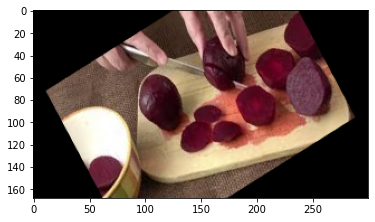

In [41]:
# from matplotlib import pyplot as plt
# input_img=all_images_loaded['Beetroot']['0.jpeg']
# rot1 = iaa.Affine(rotate=(-50,20))
# input_rot1 = rot1.augment_image(input_img)
# shear = iaa.Affine(shear=(-50,20))
# input_shear=shear.augment_image(input_img)
# plt.imshow(input_shear)

# # dest_image_name=image_path.replace(image_name,'hori_'+image_name)

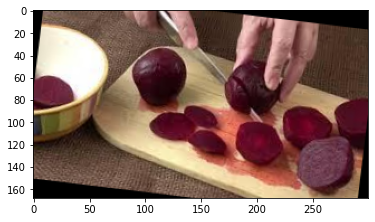

In [40]:
# plt.imshow(input_rot1)

In [ ]:
# path=r'./NewDataset/Cleared'
# path=pathlib.Path(path)
# d1={}
# for i in path.glob('*'):
#     print(i)
#     d1[str(i).split('\\')[-1]]=len(list(i.glob('*')))
    
#     for j in i.glob('*'):
#         pass
# print(d1)
#         print(j)
#         try:
#             image_path=str(j)
#             image_name=image_path.split('\\')[-1]
#             input_img = imageio.imread(image_path)
#             #Horizontal Flip
#             hflip= iaa.Fliplr(p=1.0)               
#             input_hf= hflip.augment_image(input_img)
#             dest_image_name=image_path.replace(image_name,'hori_'+image_name)
#             im.fromarray(input_hf).convert('RGB').save(dest_image_name)
#             #Vertical Flip
#             vflip= iaa.Flipud(p=1.0) 
#             input_vf= vflip.augment_image(input_img)
#             dest_image_name=image_path.replace(image_name,'verti_'+image_name)
#             im.fromarray(input_vf).convert('RGB').save(dest_image_name)
#             rot1 = iaa.Affine(rotate=(-50,20))
#             input_rot1 = rot1.augment_image(input_img)
#             dest_image_name=image_path.replace(image_name,'rota_'+image_name)
#             im.fromarray(input_rot1).convert('RGB').save(dest_image_name)
#             crop1 = iaa.Crop(percent=(0, 0.3)) 
#             input_crop1 = crop1.augment_image(input_img)
#             dest_image_name=image_path.replace(image_name,'crop_'+image_name)
#             im.fromarray(input_crop1).convert('RGB').save(dest_image_name)
#             noise=iaa.AdditiveGaussianNoise(10,40)
#             input_noise=noise.augment_image(input_img)
#             dest_image_name=image_path.replace(image_name,'noisy_'+image_name)
#             im.fromarray(input_noise).convert('RGB').save(dest_image_name)
#             shear = iaa.Affine(shear=(-40,40))
#             input_shear=shear.augment_image(input_img)
#             dest_image_name=image_path.replace(image_name,'affined_'+image_name)
#             im.fromarray(input_shear).convert('RGB').save(dest_image_name)
#         except Exception as e:
#             fp=open('error_log.txt','w+')
#             stri='Error '+str(e)+'\n'
#             fp.write(stri)
#             fp.close()
        